In [1]:
import numpy as np
import pandas as pd
import sklearn
import math
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_features = pd.read_csv("train_features.csv")
train_labels = pd.read_csv("train_labels.csv")
validation_features = pd.read_csv("valid_features.csv")
validation_labels = pd.read_csv("valid_labels.csv")
test_features = pd.read_csv("test_features.csv")
audioData = train_features.iloc[:,9:]
audioDataV = validation_features.iloc[:,9:]
audioDataT = test_features.iloc[:,9:]

temtl = train_labels.iloc[:,1:]
temtl = temtl.values.tolist()
temvl = validation_labels.iloc[:,1:]
temvl = temvl.values.tolist()

trainLabel = []
for i in range (len(temtl)):
    trainLabel.append(temtl[i][0])
validLabel = []
for i in range (len(temvl)):
    validLabel.append(temvl[i][0])
    

scaler = StandardScaler()
stAudioData = scaler.fit_transform(audioData)
stAudioDataV = scaler.fit_transform(audioDataV)
stAudioDataT = scaler.fit_transform(audioDataT)


In [3]:
textData = train_features.iloc[:,2:3]
validtextData = validation_features.iloc[:,2:3]
testtextData = test_features.iloc[:,2:3]
text = textData.values.tolist()
validtext = validtextData.values.tolist()
testtext = testtextData.values.tolist()
for i in range(len(text)):
    text[i][0]=text[i][0].split(", ")

allTags = []
for i in range(len(text)):
    for j in range(len(text[i][0])):
        if text[i][0][j] not in allTags:
            allTags.append(text[i][0][j])
            
for i in range(len(validtext)):
    validtext[i][0]=validtext[i][0].split(", ")

for i in range(len(testtext)):
    testtext[i][0]=testtext[i][0].split(", ")

tagsDataSet = []
for i in range(len(text)):
    row = [0]*len(allTags)
    for j in range(len(text[i][0])):
        row[allTags.index(text[i][0][j])] = 1
    tagsDataSet.append(row)

validtagsDataSet = []
for i in range(len(validtext)):
    row = [0]*len(allTags)
    for j in range(len(validtext[i][0])):
        if (validtext[i][0][j] in allTags):
            row[allTags.index(validtext[i][0][j])] = 1
    validtagsDataSet.append(row)
    
testtagsDataSet = []
for i in range(len(testtext)):
    row = [0]*len(allTags)
    for j in range(len(testtext[i][0])):
        if (testtext[i][0][j] in allTags):
            row[allTags.index(testtext[i][0][j])] = 1
    testtagsDataSet.append(row)

In [4]:
tagsDataSetPd = pd.DataFrame(tagsDataSet)
validtagsDataSetPd = pd.DataFrame(validtagsDataSet)
testtagsDataSetPd = pd.DataFrame(testtagsDataSet)

stAudioDataPd = pd.DataFrame(stAudioData)
stAudioDataVPd = pd.DataFrame(stAudioDataV)
stAudioDataTPd = pd.DataFrame(stAudioDataT)

In [5]:
featureT = pd.concat([tagsDataSetPd, stAudioDataPd], axis=1, join='inner')
featureV = pd.concat([validtagsDataSetPd, stAudioDataVPd], axis=1, join='inner')
featureTest = pd.concat([testtagsDataSetPd, stAudioDataTPd], axis=1, join='inner')

In [6]:
def train_KNN(feature, label):
    KNNModel = KNeighborsClassifier(n_neighbors = 51, weights = "distance").fit(feature, label) 
    return KNNModel


In [7]:
def train_Gaussian(feature, label):
    GaussianModel = GaussianNB().fit(feature,label)
    return GaussianModel

In [8]:
def train_MLP(feature, label):
    MLPModel = MLPClassifier(hidden_layer_sizes=[200],max_iter=3000, alpha=1).fit(feature, label)
    return MLPModel

In [9]:
def train_DecisionTree(feature, label):
    dtModel = DecisionTreeClassifier(max_depth=None, criterion='entropy').fit(feature, label)
    return dtModel

In [10]:
def evaluation(predict, true):
    Acc = metrics.accuracy_score(true, predict)
    return Acc


#### K-Nearest Neighbors Classifier

In [26]:
KNNModelAudio = train_KNN(stAudioData, trainLabel)
predictAudio = KNNModelAudio.predict(stAudioDataV)
accAudioKNNModel = evaluation(predictAudio, validLabel)

KNNModelTag = train_KNN(tagsDataSet, trainLabel)
predictTag = KNNModelTag.predict(validtagsDataSet)
accTagKNNModel = evaluation(predictTag, validLabel)

KNNModelTagAndAudio = train_KNN(featureT, trainLabel)
predictTagAndAudio = KNNModelTagAndAudio.predict(featureV)
accTagAndAudioKNNModel = evaluation(predictTagAndAudio, validLabel)
                            
print('Accuracy of K-NN model trained by Audio Features: ', accAudioKNNModel)
print('Accuracy of K-NN model trained by Text Features: ', accTagKNNModel)
print('Accuracy of K-NN model trained by combination of Audio and Text Features: ', accTagAndAudioKNNModel)

Accuracy of K-NN model trained by Audio Features:  0.48
Accuracy of K-NN model trained by Text Features:  0.26666666666666666
Accuracy of K-NN model trained by combination of Audio and Text Features:  0.5444444444444444


Find the optimal K value

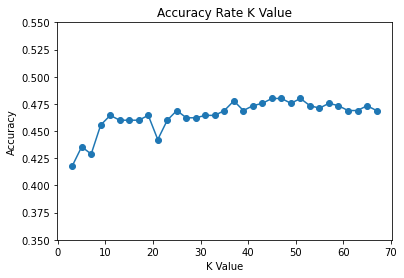

In [24]:
accuracys = []
index = []
for i in range(3, 69, 2):
    classifier = KNeighborsClassifier(n_neighbors=i, weights = "distance")
    classifier.fit(stAudioData, trainLabel)
    predictsKNN = classifier.predict(stAudioDataV)
    acc = evaluation(predictsKNN, validLabel)
    accuracys.append(acc)
    index.append(i)
plt.ylim(0.35, 0.55)
plt.plot(index,accuracys, marker='o')
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

#### Gaussian Naïve Bayes Classifier

In [27]:
GaussianModelAudio = train_Gaussian(stAudioData, trainLabel)
predictAudio = GaussianModelAudio.predict(stAudioDataV)
accAudioGaussian = evaluation(predictAudio, validLabel)

GaussianModelTag = train_Gaussian(tagsDataSet, trainLabel)
predictTag = GaussianModelTag.predict(validtagsDataSet)
accTagGaussian = evaluation(predictTag, validLabel)

GaussianModelTagAndAudio = train_Gaussian(featureT, trainLabel)
predictTagAndAudio = GaussianModelTagAndAudio.predict(featureV)
accTagAndAudioGaussian = evaluation(predictTagAndAudio, validLabel)

print('Accuracy of Gaussian Naïve Bayes model trained by Audio Features: ', accAudioGaussian)
print('Accuracy of Gaussian Naïve Bayes model trained by Text Features: ', accTagGaussian)
print('Accuracy of Gaussian Naïve Bayes model trained by combination of Audio and Text Features: ', accTagAndAudioGaussian)

Accuracy of Gaussian Naïve Bayes model trained by Audio Features:  0.37777777777777777
Accuracy of Gaussian Naïve Bayes model trained by Text Features:  0.41555555555555557
Accuracy of Gaussian Naïve Bayes model trained by combination of Audio and Text Features:  0.4177777777777778


#### Multi-layer Perceptron Classifier

In [18]:
MLPModelAudio = train_MLP(stAudioData, trainLabel)
predictAudioMLP = MLPModelAudio.predict(stAudioDataV)
accAudioMLP = evaluation(predictAudioMLP, validLabel)

predictAudioMLPTraining = MLPModelAudio.predict(stAudioData)
accAudioMLPTraining = evaluation(predictAudioMLPTraining, trainLabel)

print('Multi-layer Perceptron model trained by Audio Features:')
print('Accuracy of predicting validation instances: ', accAudioMLP)
print('Accuracy of predicting training instances: ', accAudioMLPTraining)

Multi-layer Perceptron model trained by Audio Features:
Accuracy of predicting validation instances:  0.4822222222222222
Accuracy of predicting training instances:  0.8594686116176088


In [29]:
MLPModelAudioNoSt = train_MLP(audioData, trainLabel)
predictNoSt = MLPModelAudioNoSt.predict(audioDataV)
accAudioMLPOri = evaluation(predictNoSt, validLabel)

print('Accuracy of Multi-layer Perceptron model trained by re-scaled Audio Features: ', accAudioMLP)
print('Accuracy of Multi-layer Perceptron model trained by original Audio Features: ', accAudioMLPOri)

Accuracy of Multi-layer Perceptron model trained by re-scaled Audio Features:  0.4822222222222222
Accuracy of Multi-layer Perceptron model trained by original Audio Features:  0.2777777777777778


In [28]:
MLPModelTag = train_MLP(tagsDataSet, trainLabel)
predictTagMLP = MLPModelTag.predict(validtagsDataSet)
accTagMLP = evaluation(predictTagMLP, validLabel)

predictTagMLPTraining = MLPModelTag.predict(tagsDataSet)
accTagMLPTraining = evaluation(predictTagMLPTraining, trainLabel)

print('Multi-layer Perceptron model trained by Text Features:')
print('Accuracy of predicting validation instances: ', accTagMLP)
print('Accuracy of predicting training instances: ', accTagMLPTraining)

Multi-layer Perceptron model trained by Text Features:
Accuracy of predicting validation instances:  0.5688888888888889
Accuracy of predicting training instances:  0.981245115915603


In [26]:
MLPModelTagAndAudio = train_MLP(featureT, trainLabel)
predictTagAndAudioMLP = MLPModelTagAndAudio.predict(featureV)
accTagAndAudioMLP = evaluation(predictTagAndAudioMLP, validLabel)

predictTagAndAudioMLPTraining = MLPModelTagAndAudio.predict(featureT)
accTagAndAudioMLPTraining = evaluation(predictTagAndAudioMLPTraining, trainLabel)

print('Multi-layer Perceptron model trained by Text and Audio Features:')
print('Accuracy of predicting validation instances: ', accTagAndAudioMLP)
print('Accuracy of predicting training instances: ', accTagAndAudioMLPTraining)

Multi-layer Perceptron model trained by Text and Audio Features:
Accuracy of predicting validation instances:  0.66
Accuracy of predicting training instances:  0.9958322479812451


In [30]:
print('Accuracy of Multi-layer Perceptron model trained by Audio Features: ', accAudioMLP)
print('Accuracy of Multi-layer Perceptron model trained by Text Features: ', accTagMLP)
print('Accuracy of Multi-layer Perceptron model trained by combination of Audio and Text Features: ', accTagAndAudioMLP)

Accuracy of Multi-layer Perceptron model trained by Audio Features:  0.4822222222222222
Accuracy of Multi-layer Perceptron model trained by Text Features:  0.5688888888888889
Accuracy of Multi-layer Perceptron model trained by combination of Audio and Text Features:  0.66


Find the best parameters for multi-layer perceptron classifier

In [21]:
alphas = [np.power(10.0, i) for i in range(-7, 2)]
for alpha in alphas:
    clf = MLPClassifier(hidden_layer_sizes=[200],max_iter=3000, alpha=alpha).fit(stAudioData, trainLabel)
    predict = clf.predict(stAudioDataV)
    print('Regularisation parameter: {} Accuracy: {} '.format(alpha, evaluation(predict, validLabel)))

Regularisation parameter: 1e-07 Accuracy: 0.41333333333333333 
Regularisation parameter: 1e-06 Accuracy: 0.4622222222222222 
Regularisation parameter: 1e-05 Accuracy: 0.44222222222222224 
Regularisation parameter: 0.0001 Accuracy: 0.4111111111111111 
Regularisation parameter: 0.001 Accuracy: 0.4222222222222222 
Regularisation parameter: 0.01 Accuracy: 0.4088888888888889 
Regularisation parameter: 0.1 Accuracy: 0.45111111111111113 
Regularisation parameter: 1.0 Accuracy: 0.5 
Regularisation parameter: 10.0 Accuracy: 0.4488888888888889 


In [25]:
from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(max_iter=3000)
hidden_sizes = [[100], [200], [200,100], [200,100,50]]
#arguments of MLPClassifier and a list of values for them to search and find the best.
param_grid = {'alpha': alphas, 'hidden_layer_sizes':hidden_sizes}


gs = GridSearchCV(estimator=clf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=3,
                  n_jobs=4,
                  verbose=1)
gs.fit(featureT, trainLabel)

best_params = gs.best_params_
print('Best parameters', best_params)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 11.6min finished


Best parameters {'alpha': 1, 'hidden_layer_sizes': [200]}


#### Decision Tree Classifier

In [52]:
dtModelAudio = train_DecisionTree(stAudioData, trainLabel)
predictAudiodt = dtModelAudio.predict(stAudioDataV)
accAudioDT = evaluation(predictAudiodt, validLabel)

dtModelTag = train_DecisionTree(tagsDataSet, trainLabel)
predictTagdt = dtModelTag.predict(validtagsDataSet)
accTagDT = evaluation(predictTagdt, validLabel)

dtModelTagAndAudio = train_DecisionTree(featureT, trainLabel)
predictTagAndAudiodt = dtModelTagAndAudio.predict(featureV)
accTagAndAudioDT = evaluation(predictTagAndAudiodt, validLabel)

print('Accuracy of Decision Tree model trained by Audio Features: ', accAudioDT)
print('Accuracy of Decision Tree model trained by Text Features: ', accTagDT)
print('Accuracy of Decision Tree model trained by combination of Audio and Text Features: ', accTagAndAudioDT)

Accuracy of Decision Tree model trained by Audio Features:  0.3111111111111111
Accuracy of Decision Tree model trained by Text Features:  0.3688888888888889
Accuracy of Decision Tree model trained by combination of Audio and Text Features:  0.43333333333333335


In [53]:
predictTagAndAudiodtTraining = dtModelTagAndAudio.predict(featureT)
accTagAndAudioDTTraining = evaluation(predictTagAndAudiodtTraining, trainLabel)

print('Decision Tree model trained by Text and Audio Features:')
print('Accuracy of predicting validation instances: ', accTagAndAudioDT)
print('Accuracy of predicting training instances: ', accTagAndAudioDTTraining)

Decision Tree model trained by Text and Audio Features:
Accuracy of predicting validation instances:  0.43333333333333335
Accuracy of predicting training instances:  1.0


#### Zero-R Baselion 

In [11]:
from sklearn.dummy import DummyClassifier
zero_r = DummyClassifier(strategy='most_frequent').fit(train_features, trainLabel)
predictZeroR = zero_r.predict(validation_features)
accZeroR = evaluation(predictZeroR, validLabel)
print('The accuracy of Zero-R baseline: ', accZeroR)

The accuracy of Zero-R baseline:  0.12222222222222222


#### Output the prediction of Test Instances

In [21]:
output = MLPModelTagAndAudio.predict(featureTest)
o = output.tolist()
import csv
with open('1185334.csv', mode='w', newline='') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(["trackID", "genre"])
    for i in range (len(o)):
        employee_writer.writerow([test_features["trackID"][i], o[i]])